# Project 2: Investigating the TMDb Movie Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The TMDb movie dataset is downloaded from kaggle.
This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.
Various attributes about the movie is provided
1. id
2. imdb_id
3. popularity
4. budget
5. revenue
6. original_title
7. cast
8. homepage
9. director
10. tagline
11. keywords
12. overview
13. runtime
14. genres
15. production_companies
16. release_date
17. vote_count
18. vote_average
19. release_year
20. budget_adj: the budget of the associated movie in terms of 2010 dollars,accounting for inflation over time
21. revenue_adj: the revenue of the associated movie in terms of 2010 dollars,accounting for inflation over time

In the given movie data, following analysis based on genres has been done

1. Which genre has the highest average budget
2. Which genre has the highest average revenue
3. Which genre has the highest profit
4. Which genre has the highest vote count
5. How voting average is related to genres
6. Which genre has the highest popularity
7. How many movies are released in a particular year
8. Which genre is more popular year over year
9. Which genre has most of the movies made in
10. Relation between budget and revenue earned and profit
11. Relation between vote average and profit/revenue
12. Relation between budget and popularity


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling
First of all we load the data from csv file.
We check for null values.
We drop the columns that are not needed for our analysis.
We check for duplicate rows and drop them.
We check for errors in datatype and change datatype if needed.

### General Properties

In [2]:
#loading data and printing out a few lines 
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Perform operations to inspect data
#types and look for instances of missing or possibly errant data.
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We see that 10866 non null movie enteries and 21 columns are there. Genres column has  10843 non null enteries. As we are going to analyse data based on genres, we'll drop the null genres data from the database. We don't need to change datatype of any column . We are going to used adjusted value of budget and revenue in terms of 2010 dollars which accounts for inflation. 


### Data Cleaning

In [4]:
#removing the columns which are not needed for our analysis
#using budget_adj and revenue_adj for profit calculation and analysis, so dropping budget and revenue columns
df= df.drop(columns= ['imdb_id','cast','homepage','tagline','keywords','overview','release_date','budget','revenue']) 


In [5]:
#calculationg profit using adj values
df['profit_adj']= df['revenue_adj']-df['budget_adj']
#converting budget, revenue and profit values into millions for a better plot
df['budget_adj_million']= df['budget_adj']/100000
df['revenue_adj_million']= df['revenue_adj']/100000
df['profit_adj_million']= df['profit_adj']/100000
#dropping budget_adj,revenue_adj, profit_adj
df = df.drop(['budget_adj','revenue_adj','profit_adj'], axis=1)
df.head()

,id,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj_million,revenue_adj_million,profit_adj_million
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1379.999393,13924.458925,12544.459532
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1379.999393,3481.612925,2101.613532
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1011.999555,2716.190254,1704.190699
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1839.999190,19027.231298,17187.232108
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1747.999231,13857.488015,12109.488784


#### Dropping irrelevant columns
We dropped the columns that are not relevant for our analysis

In [6]:
#checking for duplicated rows
df.duplicated().sum()

1

In [7]:
#dropping duplicate rows
df.drop_duplicates(inplace= True)

In [8]:
#checking for duplicated rows to verify
df.duplicated().sum()

0

#### Duplicated rows
We checked for duplicated rows and dropped them and verified that the function is performed correctly by checking if the duplicated rows =0

In [9]:
#Firstly dropping null genre rows
df.dropna(subset=['genres'], inplace= True)
#checking if null values dropped
df['genres'].isnull().sum()


0

#### Null Genres rows 
Dropping null genre rows for our further analysis

In [10]:
#splitting genres into additional rows
df_genre= df.assign(genres = df.genres.str.split('|')).explode('genres')
df_genre.head()
# we see that the genres are split into seperate rows

,id,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj_million,revenue_adj_million,profit_adj_million
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1379.999393,13924.458925,12544.459532
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1379.999393,13924.458925,12544.459532
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1379.999393,13924.458925,12544.459532
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1379.999393,13924.458925,12544.459532
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1379.999393,3481.612925,2101.613532


#### Splitting genres
splitting genres based on '|' into seperate rows

In [11]:
#checking number of rows again
df_genre.shape

(26955, 13)

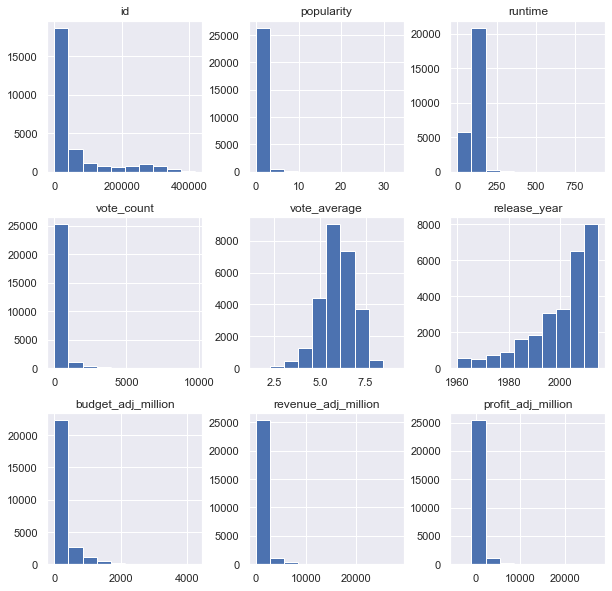

In [12]:
#plotting histograms to see the distribution of values of different variables
df_genre.hist(figsize=(10,10));

####  Histogram analysis
All plots are skewed.
Only plot closest to normal distribution is vote_average

In [13]:
#for analysing data based on genre, we'll group every other variable based on genre and find mean
genre_mean= df_genre.groupby(['genres']).mean()
genre_mean.head()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj_million,revenue_adj_million,profit_adj_million
genres,,,,,,,,,
Action,52711.553272,0.926274,104.917785,392.993708,5.787752,2000.056208,329.601092,917.582716,587.981624
Adventure,48847.743712,1.154259,106.173351,513.125085,5.940585,1999.388851,439.373353,1416.752280,977.378927
Animation,68162.277539,0.852182,68.181688,303.000000,6.403147,2003.995708,252.953497,852.561269,599.607772
Comedy,53568.424993,0.592607,96.745057,176.436330,5.905167,2000.816240,159.203138,478.970014,319.766876
Crime,47718.929838,0.744930,106.917282,278.805022,6.124889,1999.491137,215.335129,566.364101,351.028973


#### Analysis of mean values based on genres

<a id='eda'></a>
## Exploratory Data Analysis

### Research questions


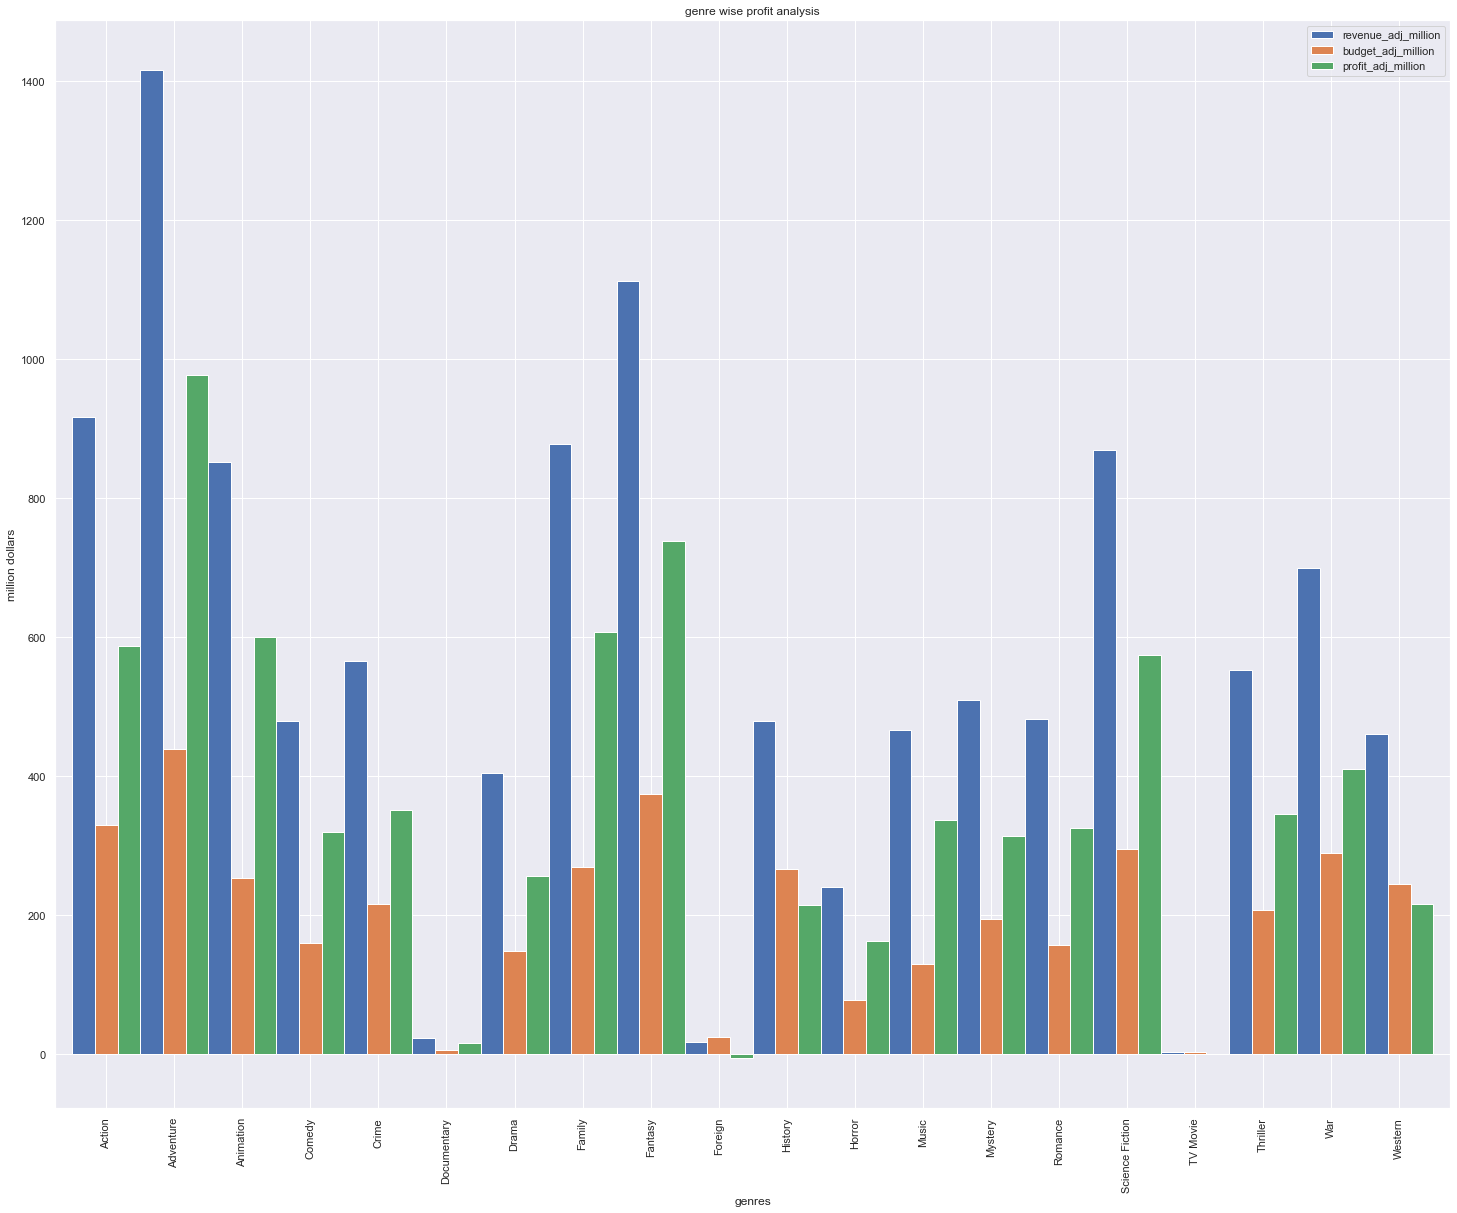

In [14]:
ax1= genre_mean[['revenue_adj_million','budget_adj_million','profit_adj_million']].plot(title='genre wise profit analysis',ylabel='million dollars', kind='bar',width=1, figsize=(25,20))
#for p in ax1.patches:
    #ax1.annotate(np.round((p.get_height()),decimals=2), (p.get_x() * 1.005, p.get_height() * 1.005))

##### 1. Which genre has the highest average budget: 
Budget: Adventure>Fantasy>Action
##### 2. Which genre has the highest average revenue: 
Revenue: Adventure>Fantasy>Action
##### 3. Which genre has the highest profit: 
Profit: Adventure>Fantasy>Family





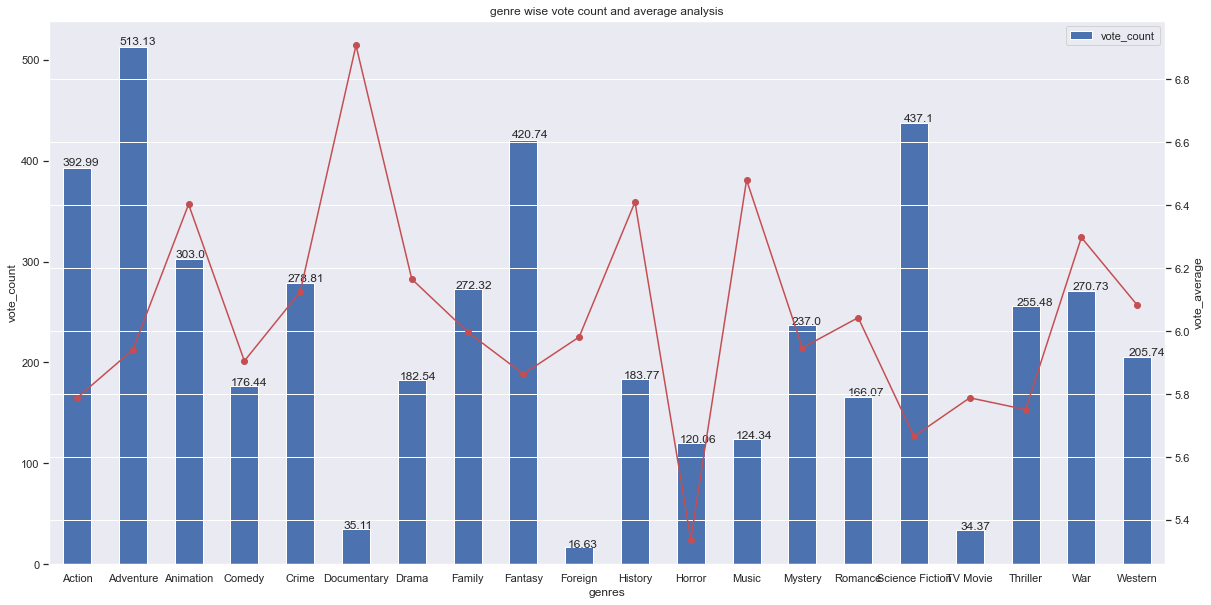

In [15]:
#plotting vote count and vote average vs genre
ax1= genre_mean[['vote_count']].plot(title='genre wise vote count and average analysis',ylabel='vote_count', kind='bar',width=0.5, figsize=(20,10));
ax2= genre_mean['vote_average'].plot(secondary_y=True, color='r', marker='o',ax=ax1)
ax2.set_ylabel('vote_average')
for p in ax1.patches:
    ax1.annotate(np.round((p.get_height()),decimals=2), (p.get_x() * 1.005, p.get_height() * 1.005))
    

#### Vote count and vote average for each genre
##### 4. Which genre has the highest vote count
Vote count: Adventure>Science Fiction> Fantasy
##### 5. How voting average is related to genres
Vote Average: Documentary>Music>History

There is a sort positive correlation between vote count and revenue but vote average has no relation with it

Text(0, 0.5, 'popularity_index')

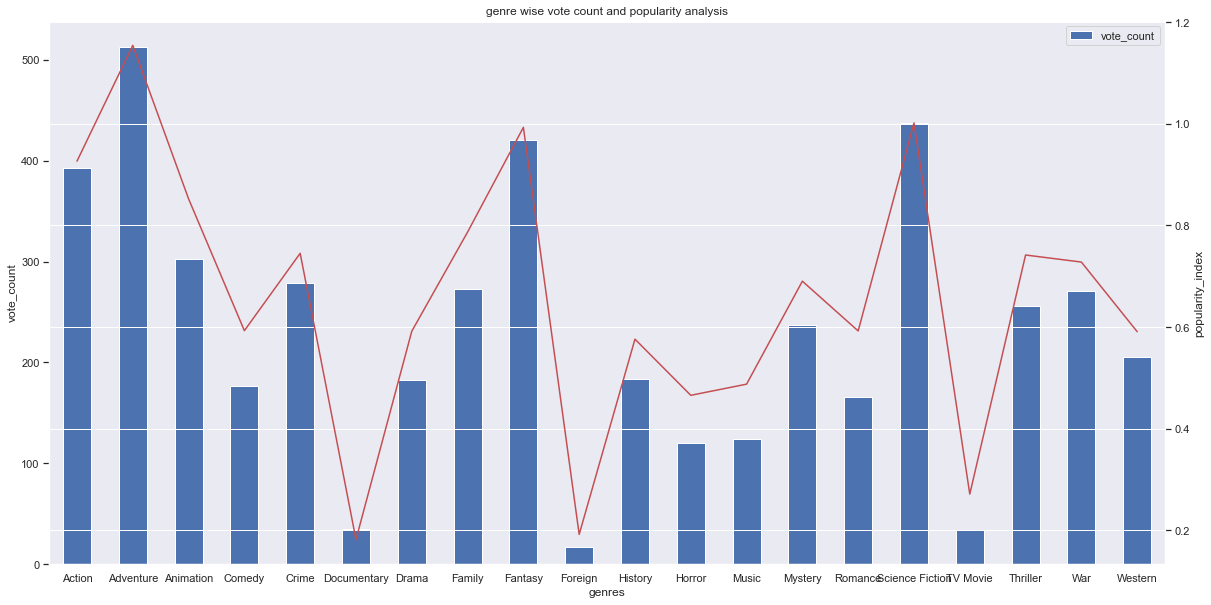

In [16]:
#plotting vote count and popularity vs genre
ax1= genre_mean[['vote_count']].plot(title='genre wise vote count and popularity analysis',ylabel='vote_count', kind='bar',width=0.5, figsize=(20,10));
ax2= genre_mean['popularity'].plot(secondary_y=True, color='r',ax=ax1)
ax2.set_ylabel('popularity_index')

#### Vote count and popularity for each genre
##### 6. Which genre has the highest popularity

Popularity index: Adventure>Fantasy>Science Fiction

Vote count and popularity have a positive correlation.

In [17]:
# top 5 profit making genres
genre_mean.sort_values('profit_adj_million',ascending=False).head(5)

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj_million,revenue_adj_million,profit_adj_million
genres,,,,,,,,,
Adventure,48847.743712,1.154259,106.173351,513.125085,5.940585,1999.388851,439.373353,1416.752280,977.378927
Fantasy,46632.173581,0.992840,100.736900,420.741266,5.863537,2000.292576,374.293150,1112.341512,738.048361
Family,50493.664500,0.786668,89.603574,272.320877,5.997563,2000.774167,269.238896,877.367102,608.128206
Animation,68162.277539,0.852182,68.181688,303.000000,6.403147,2003.995708,252.953497,852.561269,599.607772
Action,52711.553272,0.926274,104.917785,392.993708,5.787752,2000.056208,329.601092,917.582716,587.981624


In [18]:
# top 5 profit budget wise genres
genre_mean.sort_values('budget_adj_million',ascending=False).head(5)

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj_million,revenue_adj_million,profit_adj_million
genres,,,,,,,,,
Adventure,48847.743712,1.154259,106.173351,513.125085,5.940585,1999.388851,439.373353,1416.752280,977.378927
Fantasy,46632.173581,0.992840,100.736900,420.741266,5.863537,2000.292576,374.293150,1112.341512,738.048361
Action,52711.553272,0.926274,104.917785,392.993708,5.787752,2000.056208,329.601092,917.582716,587.981624
Science Fiction,60593.177380,1.001548,99.419854,437.096013,5.665582,1999.978845,295.242884,869.784183,574.541299
War,54377.877778,0.727683,127.625926,270.733333,6.297778,1996.096296,289.300668,699.861126,410.560457


In [19]:
# top 5 revenue making genres
genre_mean.sort_values('revenue_adj_million',ascending=False).head(5)

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj_million,revenue_adj_million,profit_adj_million
genres,,,,,,,,,
Adventure,48847.743712,1.154259,106.173351,513.125085,5.940585,1999.388851,439.373353,1416.752280,977.378927
Fantasy,46632.173581,0.992840,100.736900,420.741266,5.863537,2000.292576,374.293150,1112.341512,738.048361
Action,52711.553272,0.926274,104.917785,392.993708,5.787752,2000.056208,329.601092,917.582716,587.981624
Family,50493.664500,0.786668,89.603574,272.320877,5.997563,2000.774167,269.238896,877.367102,608.128206
Science Fiction,60593.177380,1.001548,99.419854,437.096013,5.665582,1999.978845,295.242884,869.784183,574.541299


Sorting profit,revenue and budget and comparing to the plots

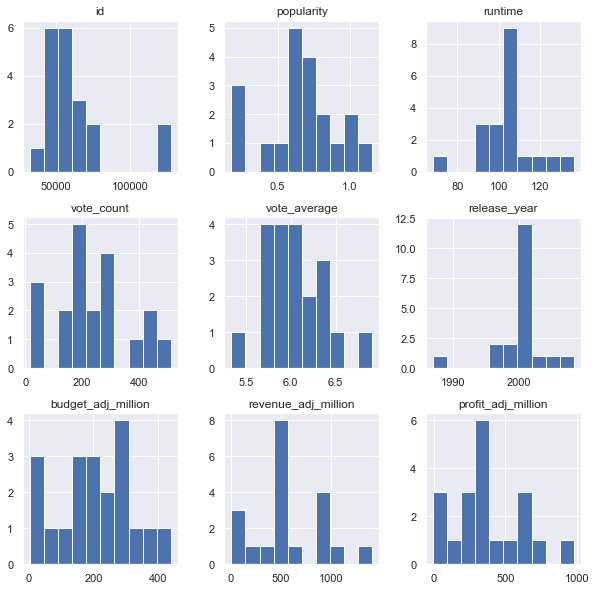

In [20]:
#plotting histograms to see the distribution of values of different variables
genre_mean.hist(figsize=(10,10), bins=10);

In [21]:
#number of movies released per year
movies_year= df.groupby('release_year').id.nunique()
movies_year.head()


release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

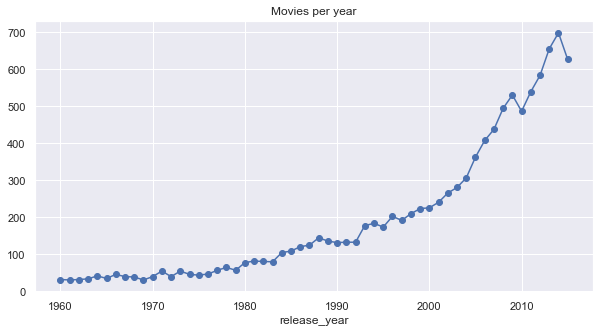

In [22]:
movies_year.plot(title='Movies per year',marker='o', figsize=(10,5));


##### 7. How many movies are released in a particular year

Following plot has been made. The number of movies are increasing in general with slight variations where the number of movies releasing have been reduced

In [23]:
#genre popular per year
movies_year_genre= pd.DataFrame(df_genre.groupby(["release_year", "genres"], as_index=False).id.nunique())
movies_year_genre.head()


,release_year,genres,id
0,1960,Action,8
1,1960,Adventure,5
2,1960,Comedy,8
3,1960,Crime,2
4,1960,Drama,13


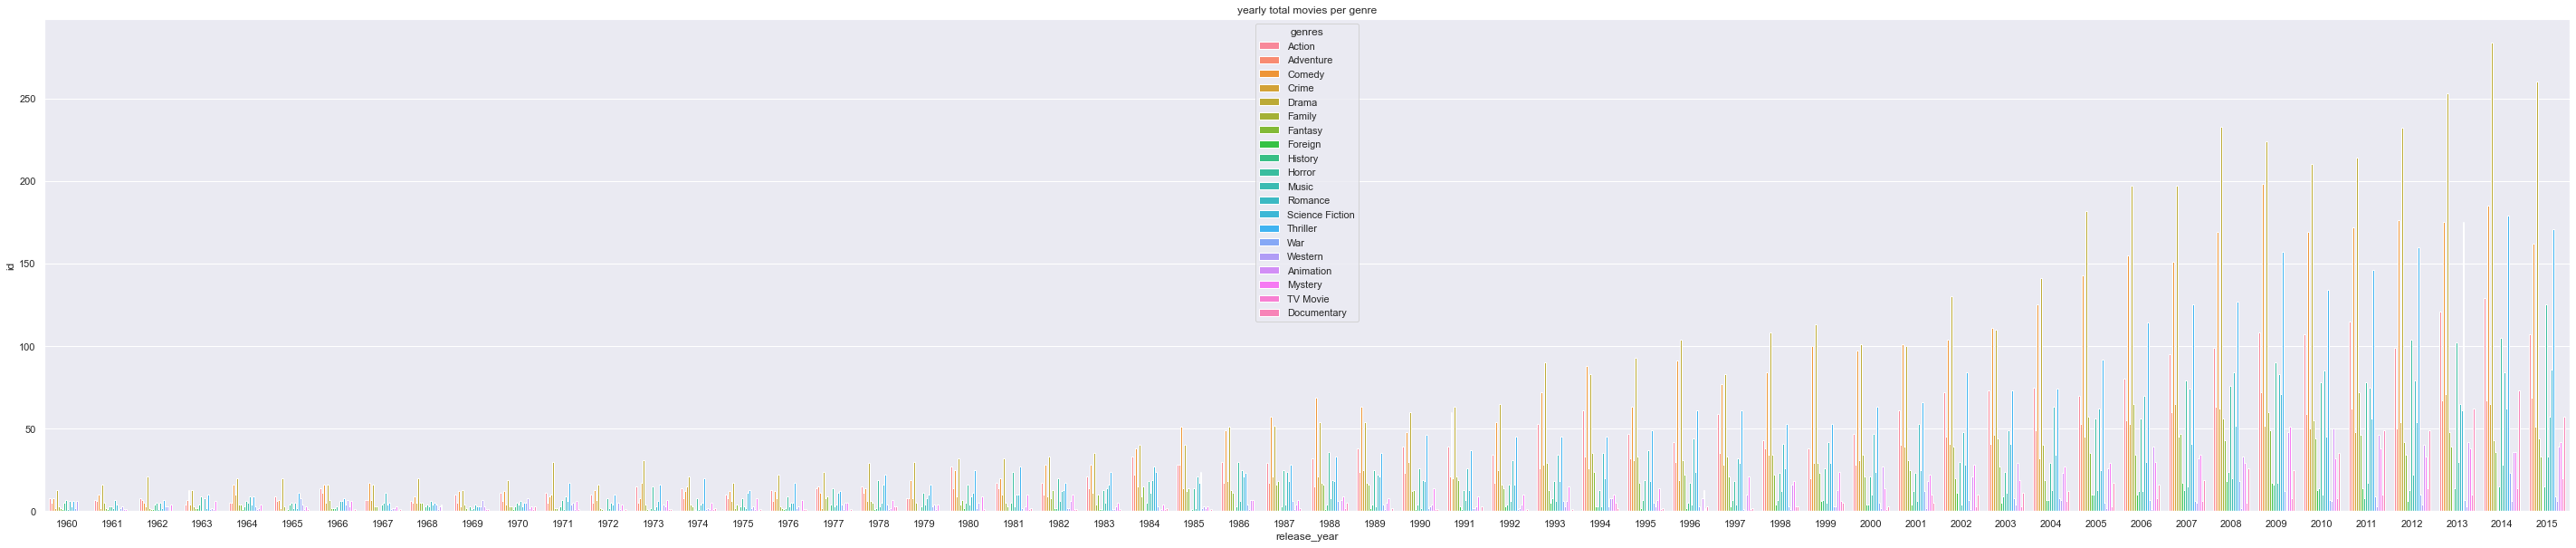

In [24]:
sns.set(rc={'figure.figsize':(50,10)})
sns.barplot(x='release_year',y='id', hue='genres',data= movies_year_genre, saturation=1).set_title("yearly total movies per genre");


##### 8. Which genre is more popular year over year
Plot of every genre every year but due to large amount of data the plot is difficult to read, so we plotted a heatmap for observing the trend for such large data. Further we analysed data for the last 5 years too

In [25]:
#pivoting data for the plots
pivoted= movies_year_genre.pivot(index='release_year',columns='genres', values='id')
pivoted.head(5)

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,8.0,5.0,NaN,8.0,2.0,NaN,13.0,3.0,2.0,1.0,5.0,7.0,1.0,NaN,6.0,3.0,NaN,6.0,2.0,6.0
1961,7.0,6.0,1.0,10.0,2.0,NaN,16.0,5.0,2.0,1.0,3.0,3.0,2.0,1.0,7.0,4.0,NaN,NaN,2.0,3.0
1962,8.0,7.0,NaN,5.0,3.0,NaN,21.0,2.0,1.0,1.0,4.0,5.0,1.0,4.0,5.0,2.0,NaN,7.0,3.0,3.0
1963,4.0,7.0,1.0,13.0,4.0,NaN,13.0,3.0,2.0,2.0,4.0,9.0,NaN,6.0,8.0,2.0,NaN,10.0,1.0,2.0
1964,5.0,5.0,2.0,16.0,10.0,NaN,20.0,4.0,4.0,1.0,3.0,6.0,5.0,4.0,9.0,4.0,NaN,9.0,3.0,1.0


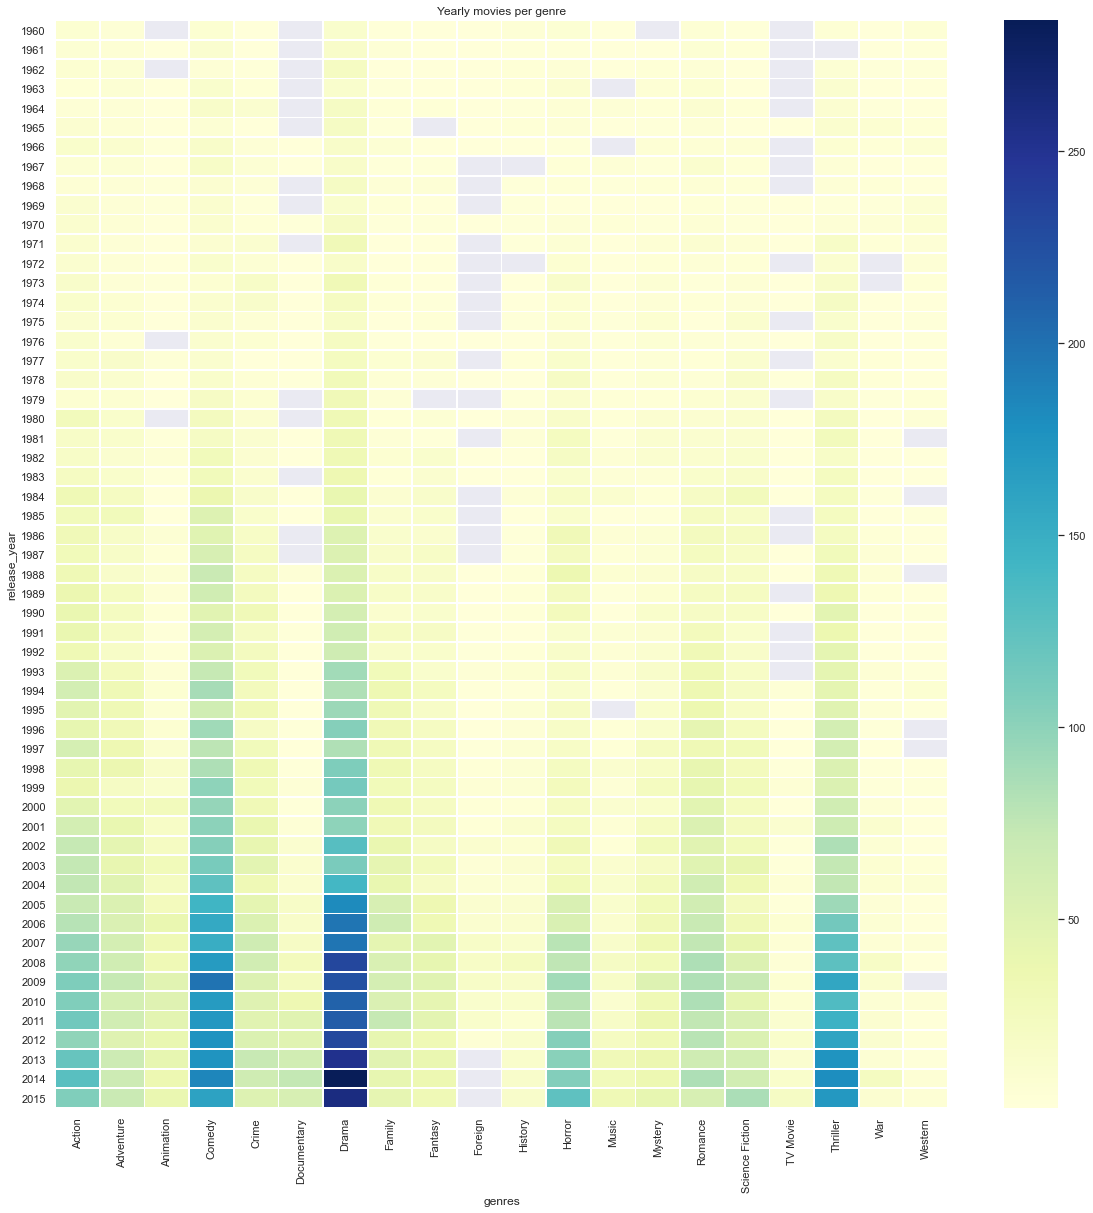

In [26]:
#Plotting heatmap
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(pivoted, annot=False, linewidth=0.8, cmap='YlGnBu').set_title('Yearly movies per genre');


Over the years, drama, comedy and thriller movies have increased. 

Action, Horror and Science Fiction has done good too

Foreign genre movies have been on a decline in last few years

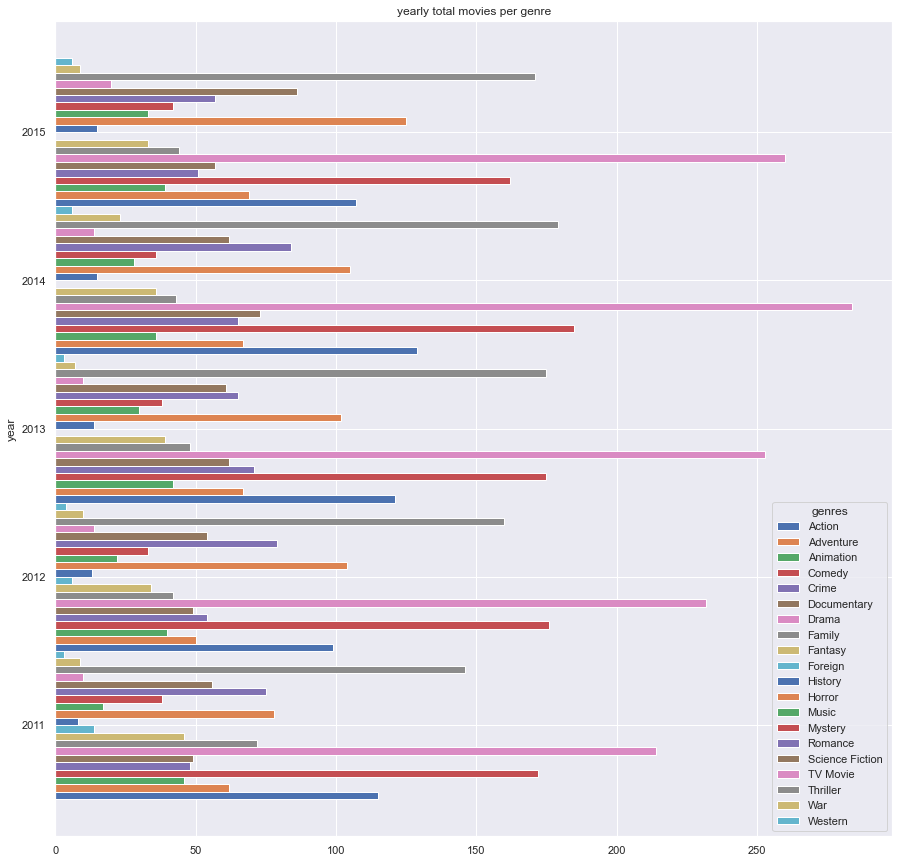

In [27]:
pivoted_5y= movies_year_genre[movies_year_genre.release_year>2010].pivot(index='release_year',columns='genres', values='id')
pivoted_5y.plot(kind='barh', figsize=(15,15), width=1, xlabel='year', ylabel='total_movies_released', title='yearly total movies per genre', stacked=False);

1. We see that the drama movies are the most common in every year for last 5 years. 
2. Comedy was the second most common genre earlier but thriller is taking over comedy in 2015. 
3. Foreign genre has reduced over the last 5 years
4. Western movies are significantly less too

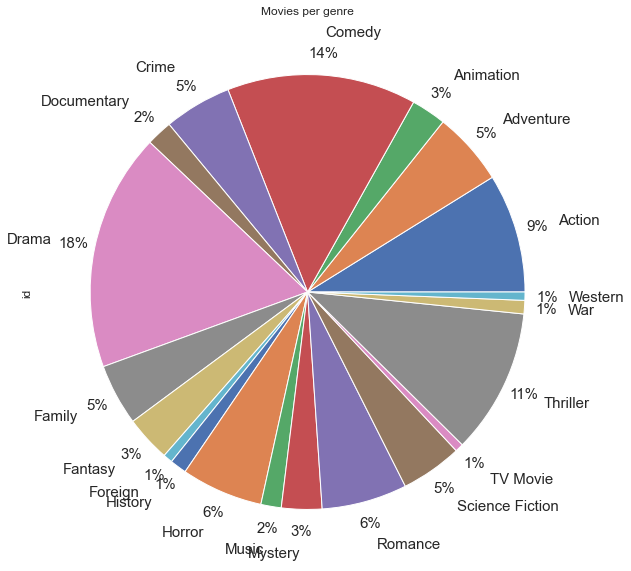

In [28]:
#movies per genre
movies_genre= df_genre.groupby(['genres']).id.nunique()
movies_genre.plot(title='Movies per genre', kind='pie',figsize=(10,10), autopct='%1.0f%%', fontsize=15, pctdistance=1.1, labeldistance=1.2);


#### Movies per genre
##### 9. Which genre has most of the movies made in
Drama- 18%

Comedy- 14%

Thriller- 11%

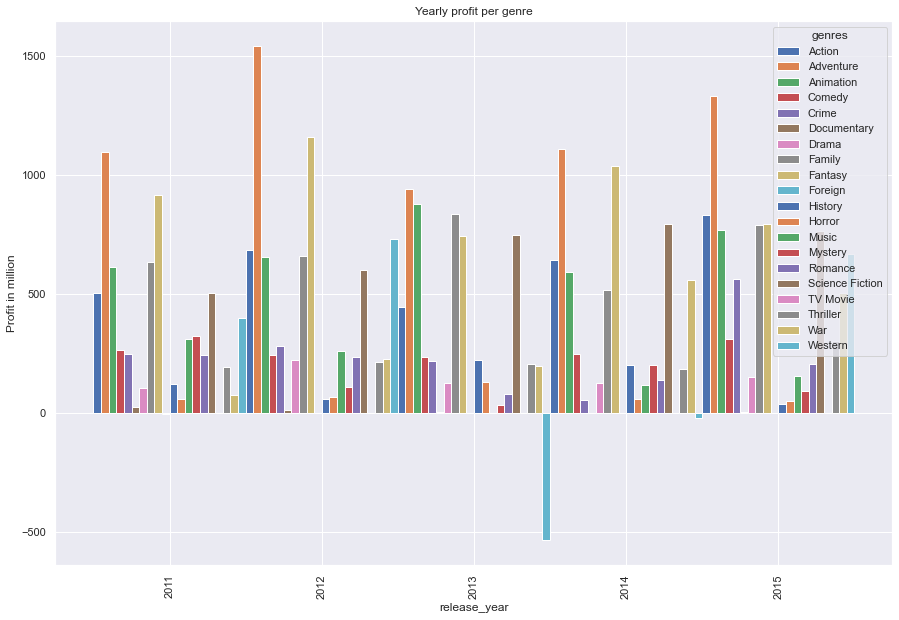

In [29]:
#genre wise profit per year from 2010
movies_year_genre_profit = pd.DataFrame(df_genre.groupby(["release_year", "genres"],as_index=False).mean())
movies_year_genre_profit.head()
pivoted_profit_5y= movies_year_genre_profit[movies_year_genre_profit.release_year>2010].pivot(index='release_year',columns='genres', values='profit_adj_million')
pivoted_profit_5y.plot(title='Yearly profit per genre',xlabel='release_year', ylabel='Profit in million', kind='bar', figsize=(15,10), width=1);

Adventure movies have been making fairly good profit over last 5 years
Action movies are also improving profits over time
During 2013, overall the profit of every genre has been on decline
Western movie made loss in 2013

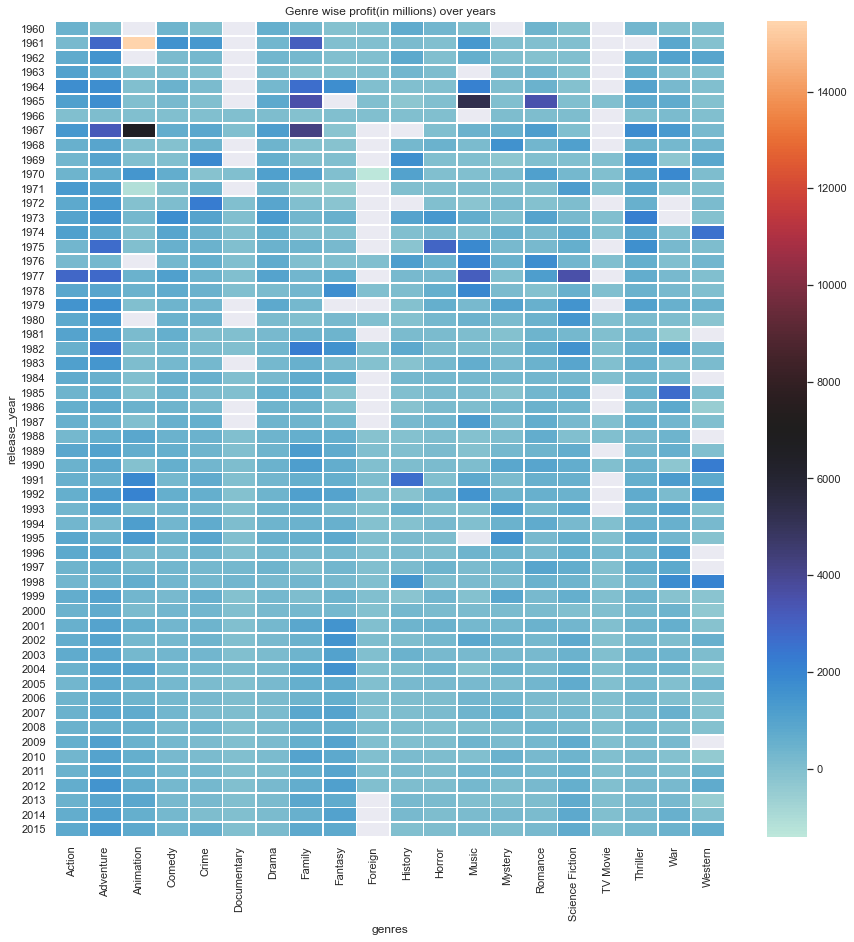

In [30]:
#genre wise profit over years
pivoted_profit= movies_year_genre_profit.pivot(index='release_year',columns='genres', values='profit_adj_million')
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(pivoted_profit, annot=False, linewidths= 0.8, center=7000).set_title('Genre wise profit(in millions) over years');

Yearly analysis of the profit of the particular genre to see the changing trends

We observe that  adventure,animation, family, fantasy  and science fiction movies have been doing good

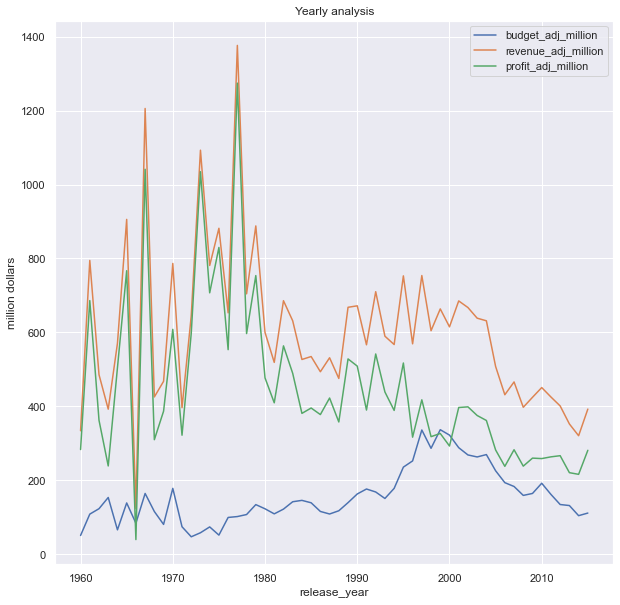

In [31]:
#yearly revenue, budget, profit
yearly_variables= df.groupby(['release_year']).mean()
yearly_variables
yearly_variables[['budget_adj_million','revenue_adj_million','profit_adj_million']].plot(title= 'Yearly analysis', ylabel='million dollars',kind='line', figsize=(10,10));

##### 10. Relation between budget and revenue earned and profit
Revenue and profit are positively correlated. But its not necessary that movie with higher budget will earn higher profit

In [32]:
#finding correlation between various variables using the linear correlation method- Pearson
df.corr(method='pearson')

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj_million,revenue_adj_million,profit_adj_million
id,1.000000,-0.013371,-0.086702,-0.034908,-0.060599,0.511300,-0.188485,-0.138126,-0.107907
popularity,-0.013371,1.000000,0.138433,0.800786,0.210432,0.090200,0.513311,0.608964,0.562754
runtime,-0.086702,0.138433,1.000000,0.163187,0.158033,-0.117665,0.220955,0.175615,0.142313
vote_count,-0.034908,0.800786,0.163187,1.000000,0.254698,0.108275,0.586923,0.707865,0.656821
vote_average,-0.060599,0.210432,0.158033,0.254698,1.000000,-0.119851,0.093811,0.193836,0.198186
release_year,0.511300,0.090200,-0.117665,0.108275,-0.119851,1.000000,0.017076,-0.066118,-0.081044
budget_adj_million,-0.188485,0.513311,0.220955,0.586923,0.093811,0.017076,1.000000,0.646507,0.472800
revenue_adj_million,-0.138126,0.608964,0.175615,0.707865,0.193836,-0.066118,0.646507,1.000000,0.977920
profit_adj_million,-0.107907,0.562754,0.142313,0.656821,0.198186,-0.081044,0.472800,0.977920,1.000000


To find correlation between various variables we used correlation function using pearson method and observe the table.

##### 11. Relation between vote average and profit/revenue
Vote average and profit have correlation value of 0.198 which shows that there is no strong positive linear correlation between them.Vote count and profit have a better positive correlation with the value of 0.66

##### 12. Relation between budget and popularity
Budget and popularity have correlation factor of 0.51 which shows that higher budget movies are likely to be popular

Graphs
###### Scatter plots will be plotted to see the deviations
1. Profit vs Vote Count
2. Profit vs Vote Average
3. Profit vs Popularity
4. Budget vs Vote Count
5. Budget vs Vote Average
6. Budget vs Popularity
7. Revenue vs Vote Count
8. Revenue vs Vote Average
9. Revenue vs Popularity
10. Budget vs Profit
11. Budget vs Revenue
12. Revenue vs Profit
13. Vote Count vs Popularity


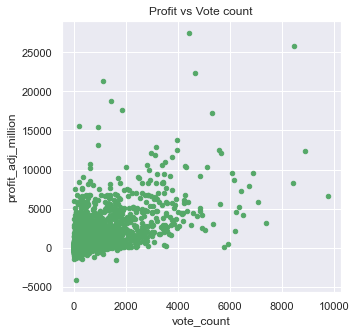

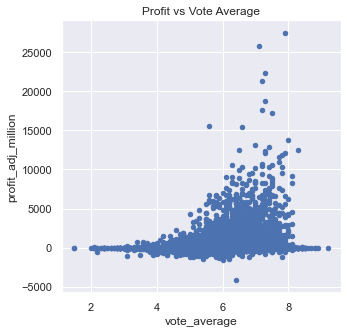

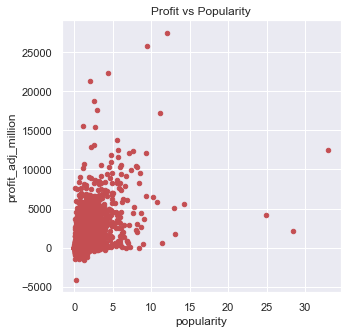

In [33]:
df.plot(kind='scatter', x='vote_count', y='profit_adj_million', figsize=(5,5), title='Profit vs Vote count', color='g');
df.plot(kind='scatter', x='vote_average', y='profit_adj_million', figsize=(5,5), title='Profit vs Vote Average', color='b');
df.plot(kind='scatter', x='popularity', y='profit_adj_million', figsize=(5,5), title='Profit vs Popularity', color='r');

Profit vs votecount have a stronger positive correlation than popularity. No correlation is found wrt to vote average

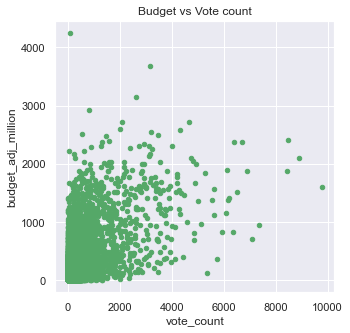

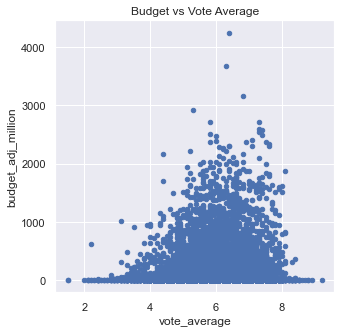

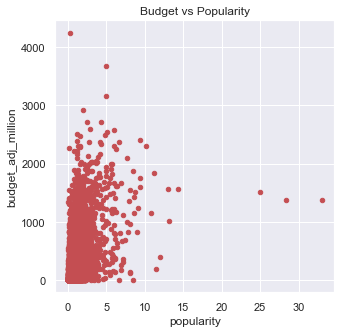

In [34]:
df.plot(kind='scatter', x='vote_count', y='budget_adj_million', figsize=(5,5), title='Budget vs Vote count', color='g');
df.plot(kind='scatter', x='vote_average', y='budget_adj_million', figsize=(5,5), title='Budget vs Vote Average', color='b');
df.plot(kind='scatter', x='popularity', y='budget_adj_million', figsize=(5,5), title='Budget vs Popularity', color='r');

Budget vs votecount have a stronger positive correlation than popularity. 

No correlation is found wrt to vote average

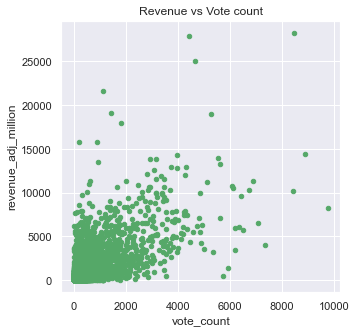

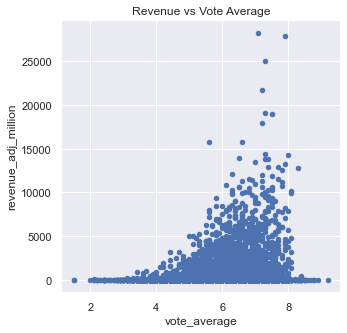

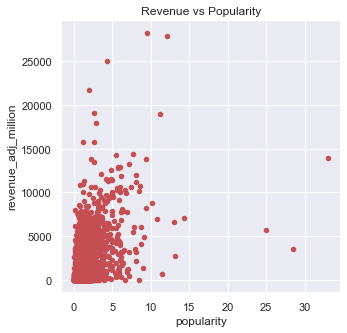

In [35]:
df.plot(kind='scatter', x='vote_count', y='revenue_adj_million', figsize=(5,5), title='Revenue vs Vote count', color='g');
df.plot(kind='scatter', x='vote_average', y='revenue_adj_million', figsize=(5,5), title='Revenue vs Vote Average', color='b');
df.plot(kind='scatter', x='popularity', y='revenue_adj_million', figsize=(5,5), title='Revenue vs Popularity', color='r');

Revenue vs vote count have a stronger positive correlation than popularity.It means movie with high vote count has higher chances of earning more revenue.

No correlation is found wrt to vote average

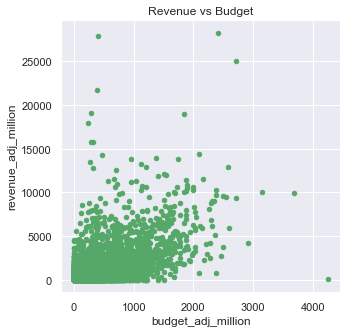

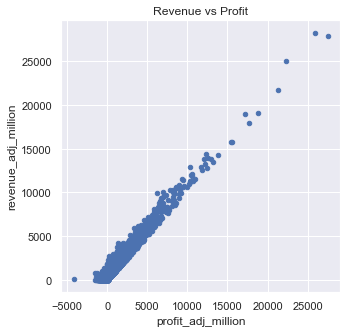

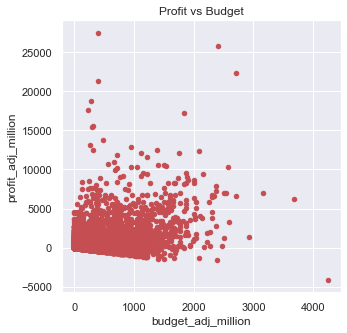

In [36]:
df.plot(kind='scatter', x='budget_adj_million', y='revenue_adj_million', figsize=(5,5), title='Revenue vs Budget', color='g');
df.plot(kind='scatter', x='profit_adj_million', y='revenue_adj_million', figsize=(5,5), title='Revenue vs Profit', color='b');
df.plot(kind='scatter', x='budget_adj_million', y='profit_adj_million', figsize=(5,5), title='Profit vs Budget', color='r');

We see a strong positive correlation between profit and revenue. As profit is calculated using revenue, it seems like an obvious thing.

Budget has a moderate correlation with revenue (0.65), which hints to the fact that higher budget movies are expected to gain higher revenues

Budget and profit also have a moderate correlation (0.48) because profit is calculated using revenue and budget only.



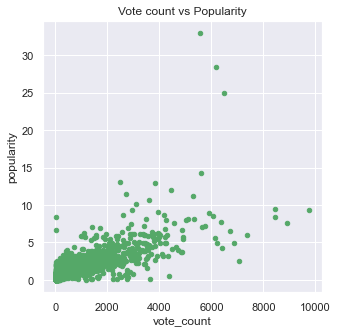

In [37]:
df.plot(kind='scatter', x='vote_count', y='popularity', figsize=(5,5), title='Vote count vs Popularity', color='g');

Vote count and popularity are positively related(0.8). Higher vote count means higher popularity

<a id='conclusions'></a>
## Conclusions

As a movie maker following facts should be conisdered

1. Movie with higher vote average doesn't mean the movie is going to make big profit
2. Movie with higher budget are likely to earn more revenue but no necessarily will make huge profits
3. Movie with higher vote count are more popular and likely to earn higher profits
4. Western movies have made loss in 2013, 2014. This seems a risky genre
5. Safest genre to make profit over the years is adventure
6. To earn maximum profit, the genre to be chosen- Adventure, Fantasy or Family
7. To get highest vote_average, the genres to be chosen- Documentary, Music or History 
8. For low budget movies with profit, one must go for documentary movies
9. For popularity, the genre chosen must be  Adventure, Fantasy or Science Fiction

Note:  All the correlation coefficient might has disorders due to presence of outliers. Therefore it is not necessary that in all cases the correlation is true. We have not analysed the level of deviation. Thus the correlation is not robust.

The analysis does not state or imply that one change causes another based solely on a correlation.



Resources used


https://stackoverflow.com/


https://seaborn.pydata.org/


https://pandas.pydata.org/


https://realpython.com/